# Jupyter Notebook: Parsing Excel file and Visualizing Data

In this notebook, we will load a Excel file, convert it to a pandas DataFrame, and then create visualizations using matplotlib.

In [1]:
pip install pandas matplotlib seaborn openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Excel File

In [3]:
# Load the Excel file into a Pandas DataFrame
df = pd.read_excel('Rate of violent victimizations 1993-2023.xlsx')

# Inspect the data
print(df.info())

# Display the first few rows of the dataframe to check the data
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   31 non-null     int64  
 1   Crime Type                             31 non-null     object 
 2   Number                                 31 non-null     int64  
 3   Number CI Lower Bound                  31 non-null     int64  
 4   Number CI Upper Bound                  31 non-null     int64  
 5   Number SE                              31 non-null     int64  
 6   Rate per 1000 persons age 12 or older  31 non-null     float64
 7   Rate CI Lower Bound                    31 non-null     float64
 8   Rate CI Upper Bound                    31 non-null     float64
 9   Rate SE                                31 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.6+ KB
None


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 persons age 12 or older,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Violent victimization,16822618,15610586,18034649,618395,79.8,74.02,85.51,2.93
1,1994,Violent victimization,17059005,15922277,18195733,579974,80.0,74.70,85.37,2.72
2,1995,Violent victimization,15202202,14187254,16217149,517840,70.7,65.96,75.40,2.41
3,1996,Violent victimization,14059520,12937792,15181248,572321,64.7,59.56,69.88,2.63
4,1997,Violent victimization,13425406,12226082,14624730,611911,61.1,55.61,66.52,2.78
5,1998,Violent victimization,12010551,10873434,13147668,580172,54.1,49.01,59.26,2.61
6,1999,Violent victimization,10600716,9569650,11631783,526064,47.2,42.61,51.80,2.34
7,2000,Violent victimization,8502602,7620985,9384218,449813,37.5,33.60,41.38,1.98
8,2001,Violent victimization,7476599,6728271,8224927,381807,32.6,29.35,35.88,1.67
9,2002,Violent victimization,7424550,6486099,8363001,478810,32.1,28.01,36.11,2.07


## Step 2: Clean and Prepare the Data

In [4]:
# Drop rows with missing values (if needed)
df.dropna(inplace=True)

# Ensure the 'Year' column is an integer and 'Value' is a float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
print(df.isnull().sum())

# Display the cleaned data
df.head(15)

Year                                     0
Crime Type                               0
Number                                   0
Number CI Lower Bound                    0
Number CI Upper Bound                    0
Number SE                                0
Rate per 1000 persons age 12 or older    0
Rate CI Lower Bound                      0
Rate CI Upper Bound                      0
Rate SE                                  0
dtype: int64


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 persons age 12 or older,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Violent victimization,16822618,15610586,18034649,618395,79.8,74.02,85.51,2.93
1,1994,Violent victimization,17059005,15922277,18195733,579974,80.0,74.70,85.37,2.72
2,1995,Violent victimization,15202202,14187254,16217149,517840,70.7,65.96,75.40,2.41
3,1996,Violent victimization,14059520,12937792,15181248,572321,64.7,59.56,69.88,2.63
4,1997,Violent victimization,13425406,12226082,14624730,611911,61.1,55.61,66.52,2.78
5,1998,Violent victimization,12010551,10873434,13147668,580172,54.1,49.01,59.26,2.61
6,1999,Violent victimization,10600716,9569650,11631783,526064,47.2,42.61,51.80,2.34
7,2000,Violent victimization,8502602,7620985,9384218,449813,37.5,33.60,41.38,1.98
8,2001,Violent victimization,7476599,6728271,8224927,381807,32.6,29.35,35.88,1.67
9,2002,Violent victimization,7424550,6486099,8363001,478810,32.1,28.01,36.11,2.07


## Step 3: Plot Line Graphs Rate per 1000 persons age 12 or older

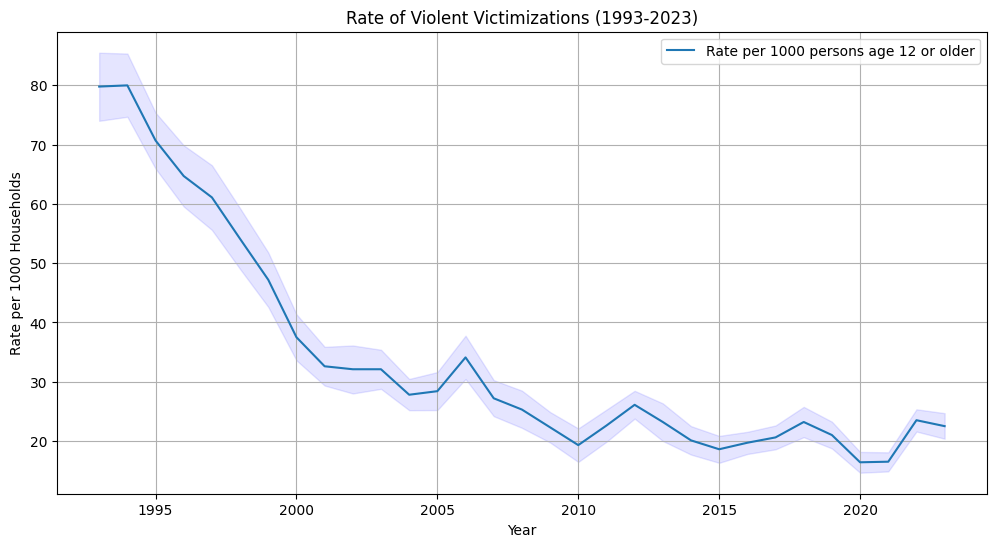

In [5]:
# Plot the 'Rate per 1000 households' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rate per 1000 persons age 12 or older', data=df, label='Rate per 1000 persons age 12 or older')
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

# Add labels and title
plt.title('Rate of Violent Victimizations (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 Households')

# Display the plot with a grid and legend
plt.grid(True)
plt.legend()
plt.show()

## Step 4: Plot Multiple Series Graphs Rate per 1000 persons age 12 or older

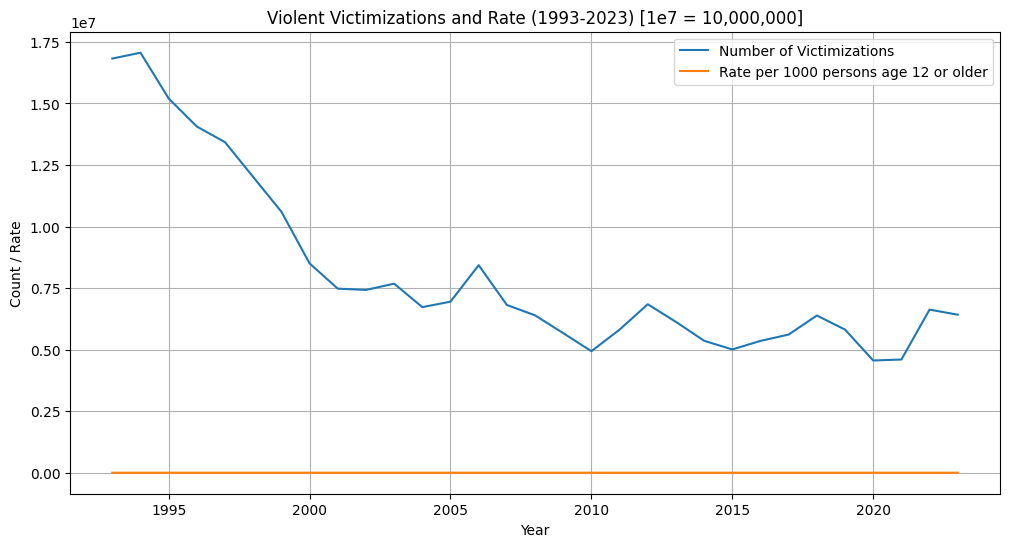

In [7]:
# Plot Multiple Series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number', data=df, label='Number of Victimizations')
sns.lineplot(x='Year', y='Rate per 1000 persons age 12 or older', data=df, label='Rate per 1000 persons age 12 or older')
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

plt.title('Violent Victimizations and Rate (1993-2023) [1e7 = 10,000,000]')
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.grid(True)
plt.legend()
plt.show()